<center><h1>Guan_Haoyu_HW7</h1></center>

Name: Haoyu Guan
<br>
Github Username: ghyharry
<br>
USC ID: 7418934031

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, silhouette_score
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import hamming
from imblearn.over_sampling import SMOTE

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df = pd.read_csv('../data/Frogs_MFCCs.csv').drop(columns = "RecordID")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [3]:
x = df.iloc[:,:22]
y = df.iloc[:,-3:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

### (b) Train a classifier for each label

#### (i) Research

Exact match/accuracy score calculated the accuracy where all the labels of each prediction is Exactlly match to its true labels. If one sample is predicted correctly, all labels should be exact match.
Hamming loss/score, is the fraction of labels that are incorrectly/correctly predicted to the total number of labels of all samples.

#### (ii) Train a SVM for each of the labels

In [4]:
np.linspace(0.2, 2, 10)

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [5]:
model = SVC(kernel = 'rbf', decision_function_shape = 'ovr')
parameters = {'C':np.logspace(-2, 4, 7),'gamma' :np.linspace(0.2, 2, 10)}
clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))
clf.fit(x_train, y_train['Family'])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])},
             scoring='accuracy')

In [7]:
print('Family')
print('best score',clf.score(x_test, y_test['Family']))
ypred = clf.predict(x_test)
print('best hamming score',1 - hamming_loss(y_test['Family'], ypred))
print('best params',clf.best_params_)

Family
best score 0.9944418712366836
best hamming score 0.9944418712366836
best params {'C': 10.0, 'gamma': 1.6}


In [8]:
clf.fit(x_train, y_train['Genus'])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])},
             scoring='accuracy')

In [9]:
print('Genus')
print('best score',clf.score(x_test, y_test['Genus']))
ypred = clf.predict(x_test)
print('best hamming score',1 - hamming_loss(y_test['Genus'], ypred))
print('best params',clf.best_params_)

Genus
best score 0.9898100972672533
best hamming score 0.9898100972672533
best params {'C': 10.0, 'gamma': 2.0}


In [10]:
clf.fit(x_train, y_train['Species'])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])},
             scoring='accuracy')

In [11]:
print('Species')
print('best score',clf.score(x_test, y_test['Species']))
ypred = clf.predict(x_test)
print('best hamming score',1 - hamming_loss(y_test['Species'], ypred))
print('best params',clf.best_params_)

Species
best score 0.9911996294580825
best hamming score 0.9911996294580825
best params {'C': 100.0, 'gamma': 1.6}


With raw attributes. For time consuming, I modified the range of C and gamma. My observation that values outside these [0.001, 0.00001]  ranges do not yield a 70% in accuracy. The "best score" is the exact match score. By piazza @820 "The metrics are for each label", hamming loss on a one-label problem is 1-accuracy.

#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [15]:
standard = StandardScaler()
stdx_train = standard.fit_transform(x_train)
stdx_test = standard.fit_transform(x_test)

In [16]:
model1 = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000)
parameters = {'C':np.logspace(-2, 4, 7)}
clf1 = GridSearchCV(model1, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))

In [17]:
clf1.fit(stdx_train, y_train['Family'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [18]:
print('Family')
print('best score',clf1.score(stdx_test, y_test['Family']))
ypred = clf1.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Family'], ypred))
print('best params',clf1.best_params_)

Family
best score 0.9333024548402038
best hamming score 0.9333024548402038
best params {'C': 10.0}


In [19]:
clf1.fit(stdx_train, y_train['Genus'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [20]:
print('Genus')
print('best score',clf1.score(stdx_test, y_test['Genus']))
ypred = clf1.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Genus'], ypred))
print('best params',clf1.best_params_)

Genus
best score 0.9416396479851783
best hamming score 0.9416396479851783
best params {'C': 100.0}


In [21]:
clf1.fit(stdx_train, y_train['Species'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [22]:
print('Species')
print('best score',clf1.score(stdx_test, y_test['Species']))
ypred = clf1.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Species'], ypred))
print('best params',clf1.best_params_)

Species
best score 0.9583140342751274
best hamming score 0.9583140342751274
best params {'C': 10.0}


With standard and l1 penalty, the performance of our model actually decreased.

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [23]:
smote = SMOTE()
smtx_train, smty_train = smote.fit_resample(stdx_train, y_train['Family'])
model2 = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000, random_state = 4)
parameters = {'C':np.logspace(-2, 4, 7)}
clf2 = GridSearchCV(model2, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10))

In [24]:
clf2.fit(smtx_train, smty_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1',
                                 random_state=4),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [25]:
print('Family')
print('best score',clf2.score(stdx_test, y_test['Family']))
ypred = clf2.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Family'], ypred))
print('best params',clf2.best_params_)

Family
best score 0.9143121815655396
best hamming score 0.9143121815655396
best params {'C': 1.0}


In [26]:
smtx_train, smty_train = smote.fit_resample(stdx_train, y_train['Genus'])
clf2.fit(smtx_train, smty_train)
print('Genus')
print('best score',clf2.score(stdx_test, y_test['Genus']))
ypred = clf2.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Genus'], ypred))
print('best params',clf2.best_params_)

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: Conv

Genus
best score 0.9170912459471978
best hamming score 0.9170912459471978
best params {'C': 100.0}


C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
smtx_train, smty_train = smote.fit_resample(stdx_train, y_train['Species'])
clf2.fit(smtx_train, smty_train)
print('Species')
print('best score',clf2.score(stdx_test, y_test['Species']))
ypred = clf2.predict(stdx_test)
print('best hamming score',1 - hamming_loss(y_test['Species'], ypred))
print('best params',clf2.best_params_)

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: Conv

Species
best score 0.9573876794812413
best hamming score 0.9573876794812413
best params {'C': 10.0}


With SMOTE, the performance of our model did not improve too much. With some C, the model did not even converge.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [29]:
sil_scores = []
for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, random_state=4)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    sil_scores.append(score)
    print("k=", k,"silhouette_score=", score)

max_silhouette_score = max(sil_scores)
optk = sil_scores.index(max_silhouette_score)+2
print('max_silhouette_score = ',max_silhouette_score)
print('optimal k ',optk)

k= 2 silhouette_score= 0.3486778410277152
k= 3 silhouette_score= 0.36768245219926315
k= 4 silhouette_score= 0.3787509343305295
k= 5 silhouette_score= 0.37148280578022025
k= 6 silhouette_score= 0.264008021116715
k= 7 silhouette_score= 0.2606084479447015
k= 8 silhouette_score= 0.25481363435099447
k= 9 silhouette_score= 0.2761303283908602
k= 10 silhouette_score= 0.27350911768663166
k= 11 silhouette_score= 0.2736330947971667
k= 12 silhouette_score= 0.2725104248216376
k= 13 silhouette_score= 0.27805232903695115
k= 14 silhouette_score= 0.2749864600974377
k= 15 silhouette_score= 0.2709663972973471
k= 16 silhouette_score= 0.27470080954102066
k= 17 silhouette_score= 0.28036304705784487
k= 18 silhouette_score= 0.28213185732831686
k= 19 silhouette_score= 0.2668838794516107
k= 20 silhouette_score= 0.2661733276154306
k= 21 silhouette_score= 0.273396617131294
k= 22 silhouette_score= 0.25876521245918943
k= 23 silhouette_score= 0.26550336681880643
k= 24 silhouette_score= 0.26838084062060025
k= 25 silh

### (b) Determine which family is the majority

In [38]:
kmeans = KMeans(n_clusters=4, random_state=4)
df['Cluster'] = kmeans.fit_predict(x)
clusterf = []
clusterg = []
clusters = []
for i in range(4):
    cluster = df[df['Cluster'] == i]
    #print(cluster_df)
    majorf = cluster['Family'].value_counts().idxmax()
    majorg = cluster['Genus'].value_counts().idxmax()
    majors = cluster['Species'].value_counts().idxmax()
    clusterf.append(majorf)
    clusterg.append(majorg)
    clusters.append(majors)
    print('Major Family in cluster ',i,' is ',majorf)
    print('Major Genus in cluster ',i,' is ',majorg)
    print('Major Species in cluster ',i,' is ',majors)
    


Major Family in cluster  0  is  Leptodactylidae
Major Genus in cluster  0  is  Adenomera
Major Species in cluster  0  is  AdenomeraHylaedactylus
Major Family in cluster  1  is  Hylidae
Major Genus in cluster  1  is  Hypsiboas
Major Species in cluster  1  is  HypsiboasCordobae
Major Family in cluster  2  is  Hylidae
Major Genus in cluster  2  is  Hypsiboas
Major Species in cluster  2  is  HypsiboasCinerascens
Major Family in cluster  3  is  Dendrobatidae
Major Genus in cluster  3  is  Ameerega
Major Species in cluster  3  is  Ameeregatrivittata


In [39]:
d = {'Family':clusterf, 'Genus': clusterg,'Species':clusters}
dfc = pd.DataFrame(data=d)
dfc

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [62]:
ypred = np.zeros_like(y)
for i in range(len(df)):
    ypred[i] = [clusterf[df['Cluster'][i]], clusterg[df['Cluster'][i]], clusters[df['Cluster'][i]]]

ytrue=y.to_numpy()
#print(ypred[0])
#print(ytrue[0])
def hamming_distance(ytrue, ypred):
    return np.sum(ytrue != ypred)

hamming_distance = np.sum(ytrue != ypred)/len(df)#[hamming_distance(ytrue[i], ypred[i]) for i in range(len(df))]
hamming_score = np.mean(ytrue == ypred)#[ytrue == ypred]
hamming_lose = np.mean(ytrue != ypred)
print('at best k=4')
print('hamming_distance',hamming_distance)
print('hamming_score',hamming_score)
print('hamming_lose',hamming_lose)

at best k=4
hamming_distance 0.66726893676164
hamming_score 0.7775770210794534
hamming_lose 0.2224229789205467


## 3. ISLR 12.6.2

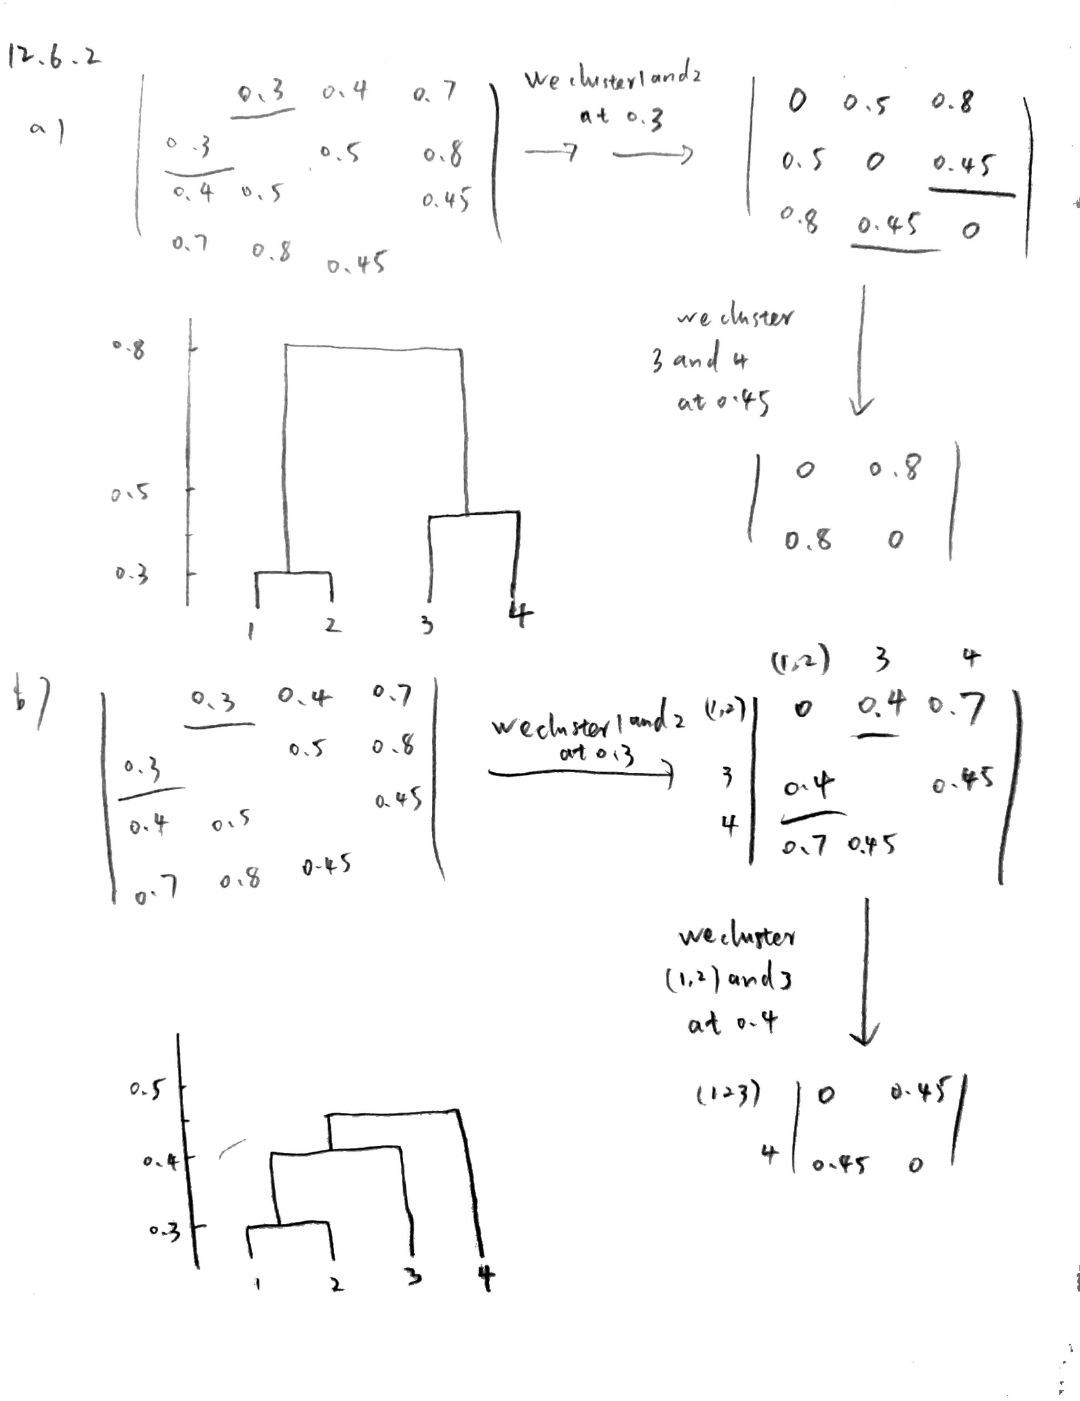

In [63]:
from IPython import display
display.Image("12621.jpg")

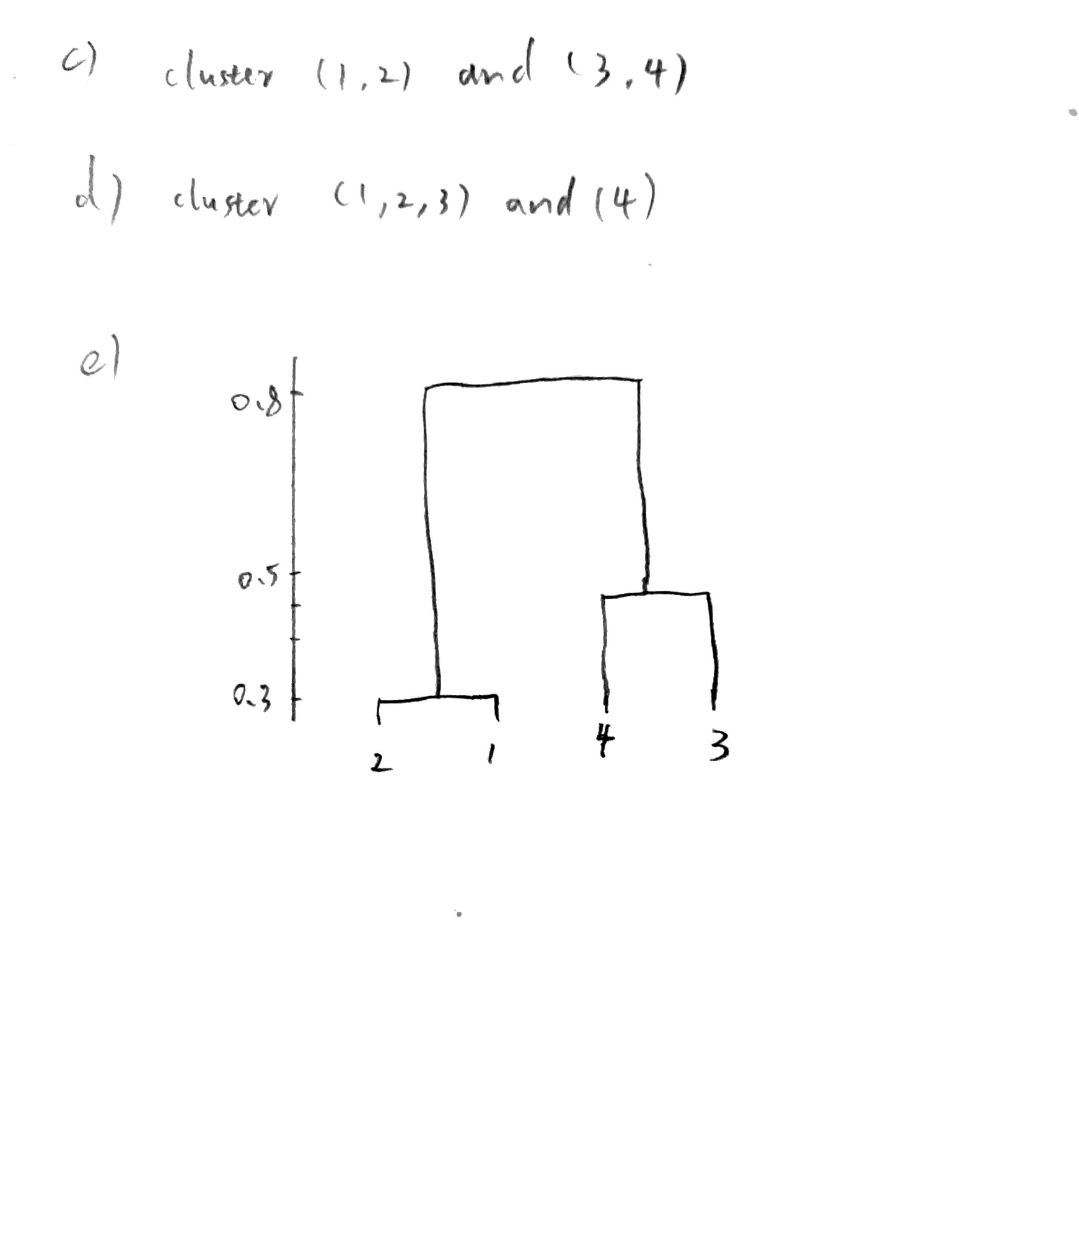

In [64]:
display.Image("12622.jpg")

reference
https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
https://datascience.stackexchange.com/questions/25046/what-is-the-difference-between-linear-svm-and-svm-with-linear-kernel